# Fraud detection
Dataset sourced from Kaggle @
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download.
Note that the features are principal components to anonymize data

The data was imported and inspected. A quick data exploration then took place. Next, an irrelevant feature was dropped. A correlation was conducted which indicated that no specific feature contributed significantly to  the target feature of fraud or no fraud. A decision tree was chosen as the ML classifier. It was trained and cross validated to produce >99% accurate predicitons. 

## Data exploration

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
import os
import sys
import scipy.stats as stats
import seaborn as sns
from sklearn import tree
import sklearn as sk

In [107]:
data_folder=os.getcwd()+"\\Data\\creditcard.csv"
data=pd.read_csv(data_folder)
print("data shape:",data.shape)
data.head(3)

data shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Quick data statistics

In [46]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


check class values. data target variable is composed of a binary flag to indicate fraud or no fraud

In [47]:
data['Class'].unique()

array([0, 1], dtype=int64)

Drop time column because it is irrelevant. It simply indicates when a transaction takes place, after an initial transaction

In [108]:
data=data.drop(['Time'],axis=1)
data.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


Check for correlation between the features and the target variable.
The pearson correlcation below shows that a large number of the principal components have very little correlation with the fraud detection. 

In [109]:
correlation=data.corr(method='pearson')

<Axes: >

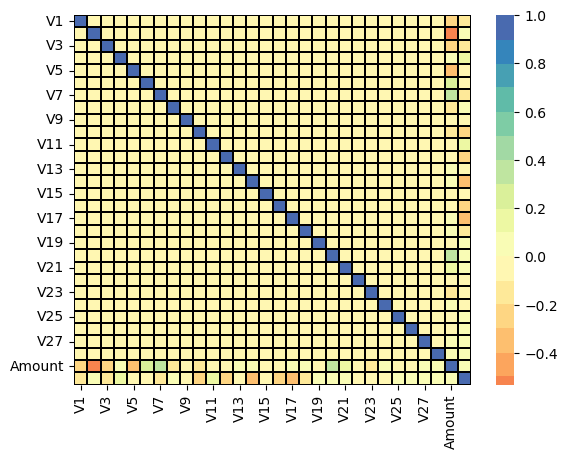

In [110]:
color_map=sns.color_palette("Spectral",20)
sns.heatmap(correlation,annot=False,linewidths=0.05,linecolor="black",center=0,cmap=color_map,vmax=1)

## Split data into train and test sets

20% test data and 80% train. Shuffle the data to make sure its evenly distributed

In [98]:
data_train,data_test=sk.model_selection.train_test_split(data,test_size=0.2,random_state=0,shuffle=True)
print("data train shape:",data_train.shape)
print("data test shape:",data_test.shape)

data train shape: (227845, 30)
data test shape: (56962, 30)


## Create decision tree classifier

In [104]:
clf = tree.DecisionTreeClassifier()
clf.fit(data_train.iloc[:,0:28], data_train.iloc[:,29])
scores = sk.model_selection.cross_val_score(clf, data_train.iloc[:,0:28], data_train.iloc[:,29], cv=5)

cross validated scores show a consistently high predictive accuracy, which suggests a high quality classifier. An F1-score will account for th class imbalances

In [105]:
#Check cross validated scores
scores

array([0.99940749, 0.99899054, 0.99914416, 0.99903443, 0.99907832])

### Test quality of classfier

The test accuracy is excellent but it can be seen that the F1-score is 0.8. This indicates that the model cannot fully accomodate the class imbalance, thereby misclassifying a small portion of the transactions.

accuracy: 0.9992802219023208
f1_score: 0.7980295566502462


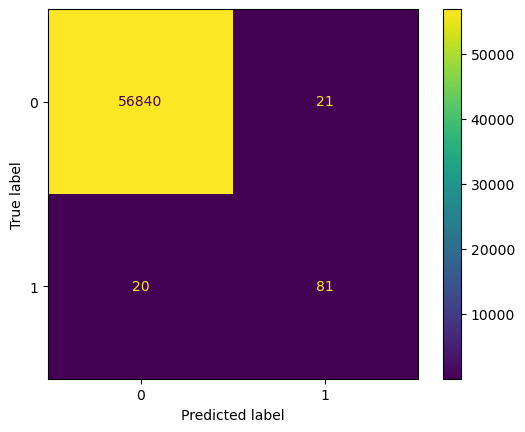

In [116]:
accuracy=clf.score(data_test.iloc[:,0:28], data_test.iloc[:,29])
f1_score=sk.metrics.f1_score(data_test.iloc[:,29],clf.predict(data_test.iloc[:,0:28]))
confusion_matrix=sk.metrics.confusion_matrix(data_test.iloc[:,29],clf.predict(data_test.iloc[:,0:28]))
print("accuracy:",accuracy)
print("f1_score:",f1_score)

#Plot confusion matrix
sk.metrics.ConfusionMatrixDisplay(confusion_matrix).plot()